In [1]:
# CNN for Image Classification using CIFAR-10
# Author: Vanshika Sood

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load CIFAR-10 dataset (automatically downloaded by Keras)
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values (0-255 → 0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class labels for reference
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Display dataset shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


/tmp/ipython-input-1747548231.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.xlabel(class_names[int(y_train[i])])


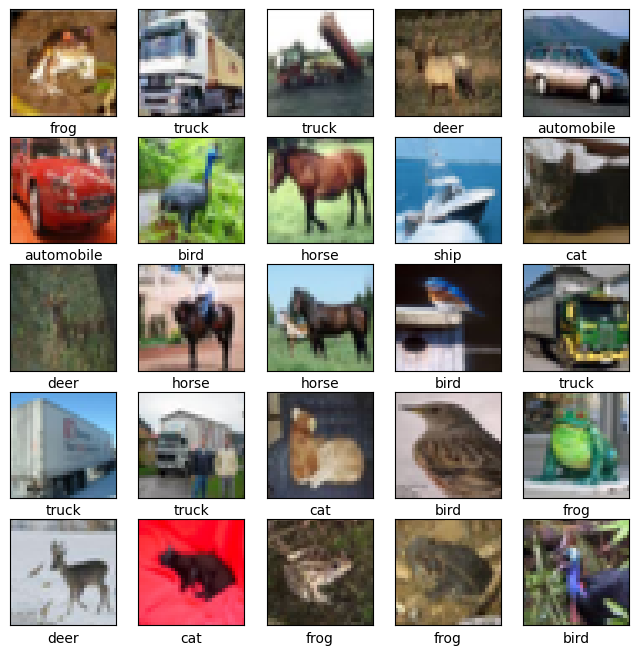

In [3]:
# Plot the first 25 images to understand the dataset
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[int(y_train[i])])
plt.show()


In [4]:
# Define CNN architecture
model = models.Sequential([
    # 1st Convolutional Block
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # 2nd Convolutional Block
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # 3rd Convolutional Block
    layers.Conv2D(128, (3, 3), activation='relu'),

    # Flattening + Dense Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # prevent overfitting
    layers.Dense(10, activation='softmax')  # 10 output classes
])

# Display model architecture summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Train the CNN model
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.7519 - loss: 0.7025 - val_accuracy: 0.7188 - val_loss: 0.8215
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7633 - loss: 0.6665 - val_accuracy: 0.7172 - val_loss: 0.8501
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.7731 - loss: 0.6372 - val_accuracy: 0.7041 - val_loss: 0.8978
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.7876 - loss: 0.6045 - val_accuracy: 0.7185 - val_loss: 0.8667
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.7919 - loss: 0.5828 - val_accuracy: 0.7212 - val_loss: 0.8638
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.8045 - loss: 0.5457 - val_accuracy: 0.7277 - val_loss: 0.8426
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.8126 - loss: 0.5262 - val_accuracy: 0.7206 - val_loss: 0.8808
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.8158 - loss: 0.5066 - 

In [8]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


313/313 - 4s - 14ms/step - accuracy: 0.7277 - loss: 0.9374

✅ Test Accuracy: 72.77%


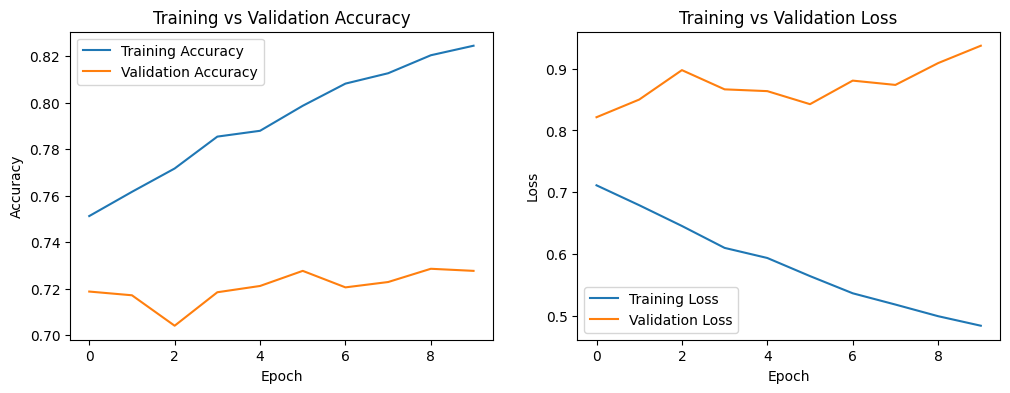

In [9]:
# Plot training history
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


/tmp/ipython-input-4068285032.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[int(y_pred_classes[i])]}")


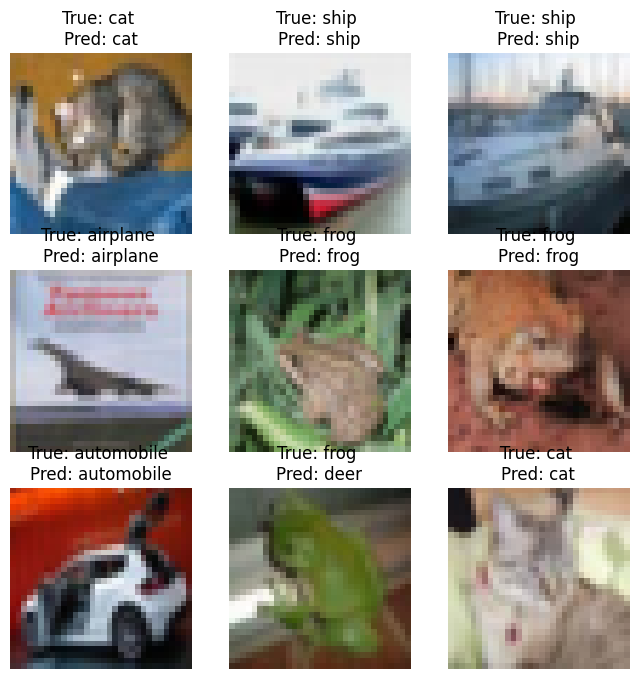

In [10]:
# Predict on test images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1).reshape(-1, 1)

# Display a few predictions
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[int(y_test[i])]} \nPred: {class_names[int(y_pred_classes[i])]}")
    plt.axis('off')
plt.show()


In [11]:
model.save('DeepLearningActivity_CNN.h5')
print("Model saved successfully as DeepLearningActivity_CNN.h5")


Model saved successfully as DeepLearningActivity_CNN.h5
